# Imports

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ruta = "/content/drive/MyDrive/Colab Notebooks/TFG TLOU Reviews/"

Mounted at /content/drive


In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

# Sentiment analisis Modelo multilingüe

## Twitter-XLM-roberta-base-sentiment

In [20]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"

#tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

text = "After great and one of the best game ever TLOU I was waiting inpatient for part two and this is worst game ever made for playstation . Graphics 9/10 , story and gameplay 0/10"
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) negative 0.7705
2) positive 0.1259
3) neutral 0.1036


# Labeling

La fase de labeling se realiza en distintos proyectos google colab con la misma configuración para paralelizar la capacidad de computo.

# Revision de los resultados del modelo multilingüe del sentiment analisis

In [ ]:
df = pd.read_excel(ruta+"sentiment_df.xlsx")
sentiment_df = df.drop(df.columns[0], axis=1)
sentiment_df.head(15)

,review,score,positive_score,negative_score,neutral_score,predominant_label
0,"Well, it's most definetly sheeet and peess and...",1,0.000000,0.935575,0.0,negative
1,"Pathetic.,Disappointment. Inconsistency.,Cring...",0,0.000000,0.959653,0.0,negative
2,A maior traição que eu já vi na minha vida do ...,0,0.000000,0.721669,0.0,negative
3,I really enjoyed the first game. It was a 10/1...,6,0.000000,0.539667,0.0,neutral
4,This game is a very sad destruction of an amaz...,0,0.000000,0.939785,0.0,negative
5,"Bruce Straley, come back to Naughty Dog, they ...",5,0.000000,0.447610,0.0,neutral
6,"It’s a different game from part one, not bad o...",2,0.000000,0.631583,0.0,negative
7,"Best gameplay, graphics, combat and definitely...",0,0.000000,0.694517,0.0,negative
8,"A story of right and wrong, written by a guy w...",2,0.000000,0.630903,0.0,negative
9,"Visually excellent, but terrible at the core. ...",1,0.000000,0.753214,0.0,negative


In [17]:
sentiment_df.loc[15, "review"]

'After great and one of the best game ever TLOU I was waiting inpatient for part two and this is worst game ever made for playstation . Graphics 9/10 , story and gameplay 0/10'

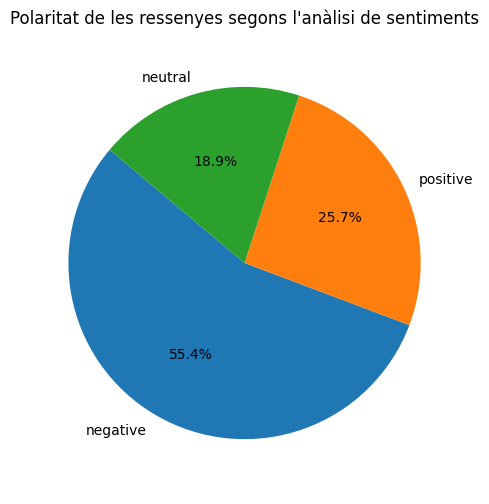

In [ ]:
label_counts = sentiment_df['predominant_label'].value_counts()

plt.figure(figsize=(5, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Polaritat de les ressenyes segons l'anàlisi de sentiments")
plt.axis('equal')
plt.show()

In [ ]:
positive_sentiments = sentiment_df[sentiment_df['predominant_label']=='positive']
negative_sentiments = sentiment_df[sentiment_df['predominant_label']=='negative']
neutral_sentiments = sentiment_df[sentiment_df['predominant_label']=='neutral']

## Mirar si la clasificación coincide con la puntuación que dan los usuarios al juego

<ipython-input-9-c3e5187df9bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=positive_sentiments, x='score', palette='viridis')


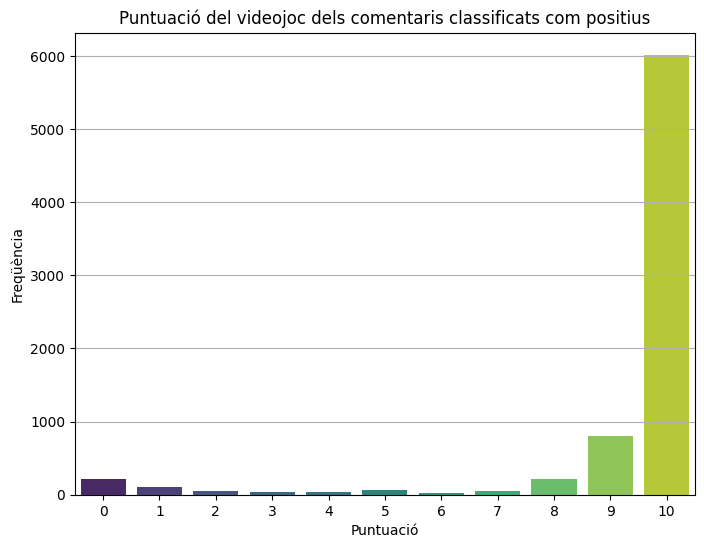

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=positive_sentiments, x='score', palette='viridis')
plt.title('Puntuació del videojoc dels comentaris classificats com positius')
plt.xlabel('Puntuació')
plt.ylabel('Freqüència')
plt.grid(axis='y')
plt.show()

<ipython-input-10-29fa6ab06c52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=negative_sentiments, x='score', palette='viridis')


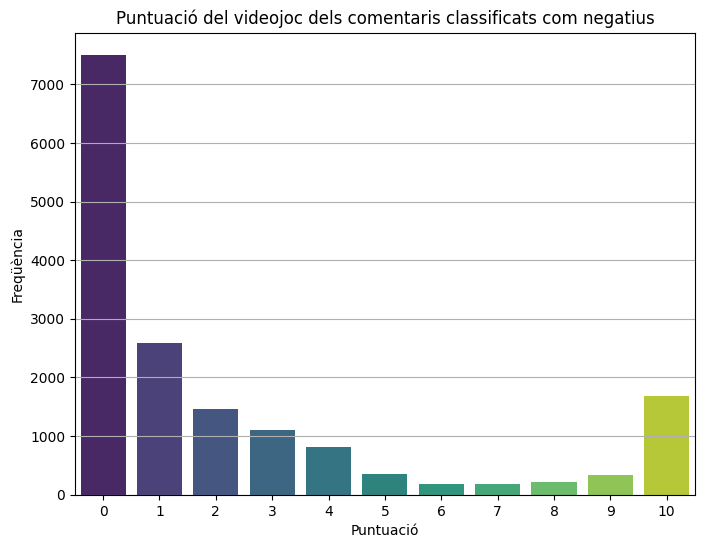

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=negative_sentiments, x='score', palette='viridis')
plt.title('Puntuació del videojoc dels comentaris classificats com negatius')
plt.xlabel('Puntuació')
plt.ylabel('Freqüència')
plt.grid(axis='y')
plt.show()

<ipython-input-11-071a6bc6b4c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=neutral_sentiments, x='score', palette='viridis')


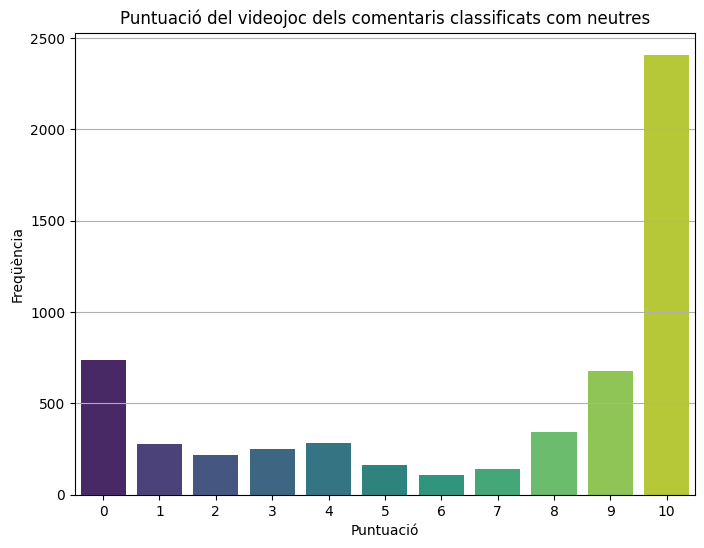

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=neutral_sentiments, x='score', palette='viridis')
plt.title('Puntuació del videojoc dels comentaris classificats com neutres')
plt.xlabel('Puntuació')
plt.ylabel('Freqüència')
plt.grid(axis='y')
plt.show()

## Mirar los lenguajes de los comentarios clasificados como neutros

In [ ]:
user_reviews_g2 = pd.read_csv(ruta+"user_reviews_g2.csv")
print(user_reviews_g2.shape)
print(neutral_sentiments.shape)

(30665, 8)
(5610, 6)


In [ ]:
# Unir los DataFrames por la columna 'id'
resultado = neutral_sentiments.merge(user_reviews_g2, on="review", how="left")
print(resultado.shape)
resultado.head()

(5633, 13)


,review,score_x,positive_score,negative_score,neutral_score,predominant_label,id,type_review,date,language,views,votes,score_y
0,I really enjoyed the first game. It was a 10/1...,6,0.000000,0.539667,0.0,neutral,wingZero21,normal,2021-03-14,English,2,2,6
1,"Bruce Straley, come back to Naughty Dog, they ...",5,0.000000,0.447610,0.0,neutral,winchesterpro,normal,2021-03-13,Russian,2,2,5
2,One of the best Games I have ever played. I ca...,0,0.330488,0.067597,0.0,neutral,RUB3n172,normal,2021-03-12,English,3,2,0
3,"Out of 100s games I have played since I was 7,...",10,0.000000,0.356551,0.0,neutral,lehaninh,normal,2021-03-11,English,4,2,10
4,"Out of 100s games I have played since I was 7,...",10,0.000000,0.356551,0.0,neutral,lehaninh,normal,2021-03-11,English,5,2,10


In [ ]:
resultado.drop(labels=['date', 'views', 'votes', 'id'], axis=1)

,review,score_x,positive_score,negative_score,neutral_score,predominant_label,type_review,language,score_y
0,I really enjoyed the first game. It was a 10/1...,6,0.000000,0.539667,0.000000,neutral,normal,English,6
1,"Bruce Straley, come back to Naughty Dog, they ...",5,0.000000,0.447610,0.000000,neutral,normal,Russian,5
2,One of the best Games I have ever played. I ca...,0,0.330488,0.067597,0.000000,neutral,normal,English,0
3,"Out of 100s games I have played since I was 7,...",10,0.000000,0.356551,0.000000,neutral,normal,English,10
4,"Out of 100s games I have played since I was 7,...",10,0.000000,0.356551,0.000000,neutral,normal,English,10
...,...,...,...,...,...,...,...,...,...
5628,Money plus Psuedo-Social Justice equals a 95 m...,0,0.000000,0.470905,0.000000,neutral,expanded,English,0
5629,NWO. How to destroy a whole story mixing polit...,0,0.000000,0.000000,0.511196,neutral,normal,English,0
5630,"Just amazing game-play,graphics, lighting, lev...",0,0.000000,0.506539,0.000000,neutral,expanded,English,0
5631,This is absolutely one of the worst direction ...,0,0.000000,0.327507,0.181954,neutral,normal,English,0


## Mirar si la longitud del texto influye al clasificar sentimientos.

In [ ]:
# Calcular la longitud de cada valor en la columna 'review'
sentiment_df['review_length'] = sentiment_df['review'].apply(len)

# Etiquetar con 'undefined' los scores<0.55
def label_undefined(row):
    if max(row['negative_score'], row['neutral_score'], row['positive_score']) < 0.55:
        return 'undefined'
    return row['predominant_label']

sentiment_df['predominant_label'] = sentiment_df.apply(label_undefined, axis=1)

<ipython-input-16-b89004d6ab0b>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(undefined_df['review_length'], shade=True, label='Fiabilitat <= 55%')
<ipython-input-16-b89004d6ab0b>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defined_df['review_length'], shade=True, label='Fiabilitat > 55%')


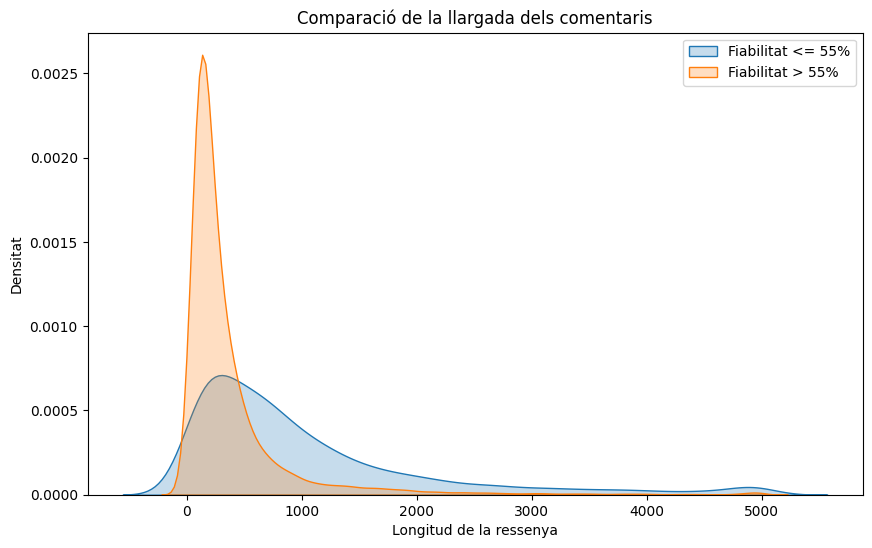

In [ ]:
undefined_df = sentiment_df[sentiment_df['predominant_label'] == 'undefined']
defined_df = sentiment_df[sentiment_df['predominant_label'] != 'undefined']

plt.figure(figsize=(10, 6))
sns.kdeplot(undefined_df['review_length'], shade=True, label='Fiabilitat <= 55%')
sns.kdeplot(defined_df['review_length'], shade=True, label='Fiabilitat > 55%')
plt.title("Comparació de la llargada dels comentaris")
plt.xlabel('Longitud de la ressenya')
plt.ylabel('Densitat')
plt.legend()
plt.show()